In [1]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16
import numpy as np
from astropy import units as u

## Lets's look at G351...

### Part 1: Find which SPICY sources are in ALMA-IMF

In [2]:
from astropy.io import fits
from astropy.table import Table

In [3]:
tbl = Table.read('/blue/adamginsburg/adamginsburg/ALMA_IMF/SPICY_ALMAIMF/SPICY_withAddOns.fits')
#tbl = Table.read('/path/to/SydneysUpdatedTable.fits')

In [4]:
tbl

# table with data from SPICY

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54228,261.68733,-36.148392,351.784512,-0.539522,0.91,--,--,ClassII,False,False,-0.87149747071616,-0.87149747071616,--,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7845-00.5395,13.145,0.052,11.336,0.049,10.514,0.061,10.152,0.056,0,4,3,3,3,,,-2147483648,--,,,--,True,G351,3.839856729009875,9.714237591626539,16690.764767924084,10775.923715570461,2191.504375460744,--,245.040,255.576,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.00025194190278621416,--,0.0004857932886640101,--,--,--,--,--,--,--,--,--,--,1.5304803,0.07301374,5.2304845,0.23513186,7.0913143,0.39685336,5.3898063,0.27690747,3839.856729009875,9714.23759162654,121113.66395279992,131598.40467341556,52534.23745506961,--,--,--,--,--
102000,290.895932,14.507368,49.470859,-0.35695,--,0.63,--,uncertain,False,False,--,--,--,--,EnvIII,G49.4-0.3,--,--,--,--,--,SSTGLMC G049.4708-00.3569,12.872,0.073,10.656,0.178,9.875,0.125,--,--,0,2,2,2,0,,J192335.04+143026.0,-2147483648,--,,,--,True,W51IRS2,5.116050351739281,14.437040307310998,30154.78003406038,13646.467026860279,4288.309719998358,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,7.505199606055623e-05,--,0.0001945162169564486,--,--,--,--,--,--,--,--,--,--,1.968014,0.13180277,9.78457,1.5978471,12.773987,1.4649067,--,--,5116.050351739281,14437.040307310997,218812.97510311904,166654.2319307901,102798.37158158218,--,--,--,--,--
92122,281.961658,-1.891406,30.839278,-0.063711,0.73,--,--,FS,False,False,0.0383822789210779,0.0383822789210779,--,--,EnvIII,G30.7-0.0,--,--,--,--,--,SSTGLMC G030.8392-00.0637,12.382,0.08,12.144,0.085,11.19

In [5]:
tbl['ALMA-IMF_1mm_eflux'] = tbl['ALMA-IMF_1mm_eflux'].quantity.to(u.mJy/u.beam)
tbl['ALMA-IMF_3mm_eflux'] = tbl['ALMA-IMF_3mm_eflux'].quantity.to(u.mJy/u.beam)
tbl['ALMA-IMF_1mm_flux'] = tbl['ALMA-IMF_1mm_flux'].quantity.to(u.mJy/u.beam)
tbl['ALMA-IMF_3mm_flux'] = tbl['ALMA-IMF_3mm_flux'].quantity.to(u.mJy/u.beam)

In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [7]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from spectralindex import prefixes


In [8]:
from spectral_cube import SpectralCube

In [9]:
from spitzer_plots import get_spitzer_data
from astropy.coordinates import SkyCoord
from astropy import units as u
coords = SkyCoord(tbl['l'], tbl['b'], frame='galactic', unit=(u.deg, u.deg))
coords

<SkyCoord (Galactic): (l, b) in deg
    [(351.784512, -0.539522), ( 49.470859, -0.35695 ),
     ( 30.839278, -0.063711), ( 30.703544, -0.101092),
     ( 30.78843 , -0.055286), ( 30.70213 , -0.087642),
     ( 30.724033, -0.076067), ( 30.714   , -0.076978),
     ( 30.723967, -0.070483), ( 30.728408, -0.055667),
     ( 30.713814, -0.047481), ( 12.836139, -0.210636),
     ( 12.830878, -0.210886), ( 12.828858, -0.208622),
     ( 49.472292, -0.358356), ( 12.830314, -0.195481),
     ( 12.824183, -0.192094), ( 12.798616, -0.205089),
     ( 12.790416, -0.204406), ( 12.781019, -0.208414),
     ( 12.789285, -0.197697), ( 12.792094, -0.187058),
     ( 10.615213, -0.400531), (353.38322 , -0.351558),
     (351.781787, -0.551292), (328.262299, -0.522333),
     (338.935597,  0.549133), (328.25402 , -0.538444),
     (333.597643, -0.199367), ( 12.808552, -0.203475),
     (328.245542, -0.551031), ( 49.486465, -0.356683),
     ( 49.489351, -0.405853), ( 10.619725, -0.380469),
     ( 10.612166, -0.381506),

In [10]:
import os
pwd = os.getcwd()
os.chdir('/orange/adamginsburg/ALMA_IMF/May2021Release')

prefixes['W43MM1'] = dict(
    finaliter_prefix_b3="W43-MM1/B3/cleanest/W43-MM1_B3_uid___A001_X1296_X1af_continuum_merged_12M_robust0_selfcal4_finaliter",
    finaliter_prefix_b6="W43-MM2/B6/cleanest/W43-MM2_B6_uid___A001_X1296_X113_continuum_merged_12M_robust0_selfcal5_finaliter",)

for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")
    
os.chdir(pwd)
    
# matches between both data

G328: 17
G333: 2
G12: 11
W51IRS2: 4
G008: 13
G327: 6
G10: 8
G337: 10
G338: 5
G351: 21
G353: 11
W43MM3: 6
W43MM2: 6
W43MM1: 2
W51-E: 2


In [11]:
for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")
    print(tbl[matches][['SPICY','p1','class','UKIDSS','VIRAC']])
    print()
    
# table displaying matching data for specific regions

G328: 17
SPICY  p1    class   UKIDSS    VIRAC   
----- ---- --------- ------ -----------
31420 0.84   ClassII        -2147483648
31432  0.8 uncertain        -2147483648
31438 0.82        FS        -2147483648
31463 0.55 uncertain        -2147483648
31395 0.91        FS        -2147483648
31362   -- uncertain          336878763
31366 0.71        FS          336878800
31389 0.66   ClassII          336879047
31390   -- uncertain          336879062
31405   -- uncertain          336879094
31367 0.76        FS          336993608
31444   -- uncertain          337036046
31441   -- uncertain          337036104
31415  0.9    ClassI          337085859
31423 0.56    ClassI          337085862
31431 0.87    ClassI          337085901
31453 0.55    ClassI          337286988

G333: 2
SPICY  p1    class   UKIDSS    VIRAC   
----- ---- --------- ------ -----------
36263 0.81 uncertain        -2147483648
36252   -- uncertain          341170319

G12: 11
SPICY  p1    class          UKIDSS          VIRAC   


### Show the sources on the ALMA-IMF cutouts

In [12]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

# use matches and display them over spitzer plots

In [13]:
import spitzer_plots
from spitzer_plots import show_fov_on_spitzer, contour_levels
from spectralindex import prefixes
from spectral_cube import SpectralCube
from astropy import units as u

In [14]:
from astropy import coordinates

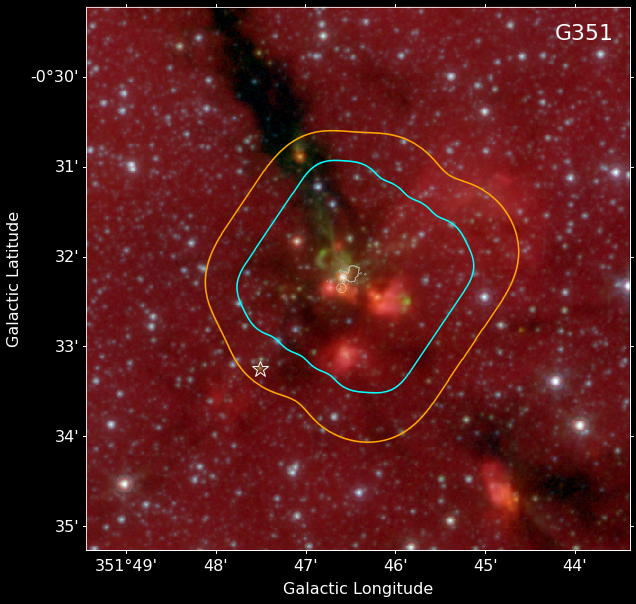

In [15]:
# data from my region (G351...)

fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/May2021Release'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath='/orange/adamginsburg/ALMA_IMF/RestructuredImagingResults/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5[5].ra.deg, cc.fk5[5].dec.deg,'*', mfc='none', mec='w', markersize=17, transform=ax.get_transform('fk5'), )


ax.axis('off')
fig.savefig(f'/home/spetz/figures/source2', dpi = 300)

In [17]:
from astroquery.vizier import Vizier
from astroquery.svo_fps import SvoFps

In [18]:
from astropy import table

### Obtain VVV "VIRAC" YZJHK magnitudes to go along with the Spitzer magnitudes

( This grabs the rows of the VIRAC table matched in SPICY and merges them. )

In [19]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys=['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0',]):
    return np.array([tb[rownum][key] for key in keys])

In [20]:
magcols = ['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0',]
emagcols = ['Yell', 'Zell', 'Jell', 'Hell', 'KsEll','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0',]

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4']
filter_meta = table.vstack([SvoFps.get_filter_list(facility='Paranal', instrument='VIRCAM'),
                            SvoFps.get_filter_list(facility='Spitzer', instrument='IRAC')])
zpts = {filtername: filter_meta[filter_meta['filterID']==filtername]['ZeroPoint'] for filtername in filternames}
wavelengths = [np.average(SvoFps.get_transmission_data(filtername)['Wavelength'],
                          weights=SvoFps.get_transmission_data(filtername)['Transmission'])
              for filtername in filternames]

In [21]:
# starting the process of creating a sed model

robitaille_modeldir = '/blue/adamginsburg/richardson.t/research/flux/robitaille_models/'

In [22]:
from sedfitter import fit, Fitter
from astropy import units as u

In [23]:
from sedfitter.filter import Filter
from astroquery.svo_fps import SvoFps

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4', 'Herschel/Pacs.blue',
             'Herschel/Pacs.red', 'Herschel/SPIRE.PSW','Herschel/SPIRE.PMW','Herschel/SPIRE.PLW', 'Spitzer/MIPS.24mu']
filtercurves = {filtername: SvoFps.get_transmission_data(filtername) for filtername in filternames}
wavelengths = [np.average(filtercurves[filtername]['Wavelength'],
                          weights=filtercurves[filtername]['Transmission'])
              for filtername in filternames]
wavelength_dict = {filtername: np.average(filtercurves[filtername]['Wavelength'],
                                          weights=filtercurves[filtername]['Transmission'])*u.AA
                   for filtername in filternames}

filterfreqs = {filtername: u.Quantity(filtercurves[filtername]['Wavelength'], u.AA).to(u.Hz, u.spectral()) for filtername in filternames}
filtertrans = {filtername: np.array(filtercurves[filtername]['Transmission'])[np.argsort(filterfreqs[filtername])]
              for filtername in filternames}
filterfreqs = {filtername: np.sort(filterfreqs[filtername]) for filtername in filternames}

sed_filters = [Filter(name=filtername,
                      central_wavelength=wl*u.AA,
                      nu=filterfreqs[filtername],
                      response=filtertrans[filtername])
               for filtername, wl in zip(filternames, wavelengths)]

almaimf_bandends_1mm = [[216.10085679, 216.36181569],
                        [217.05104378, 217.31175857],
                        [219.90488464, 220.04866835],
                        [218.13102322, 218.39222624],
                        [219.51976276, 219.66379059],
                        [230.31532951, 230.81137113],
                        [231.06503709, 231.56181105],
                        [231.52507012, 233.42623749]]*u.GHz
nu_1mm = np.linspace(almaimf_bandends_1mm.min(), almaimf_bandends_1mm.max(), 5000)
response_1mm = np.zeros(nu_1mm.size, dtype='bool')
for start, stop in almaimf_bandends_1mm:
    response_1mm |= (nu_1mm > start) & (nu_1mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_1mm',
                          central_wavelength=(228.15802*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_1mm,
                          response=response_1mm.astype(float),
                         ))

for filterfunc in sed_filters:
    filterfunc.normalize()


almaimf_bandends_3mm = [[ 93.13410936,  93.25141259],
                        [ 91.75059068,  92.68755174],
                        [102.15273354, 103.0896946 ],
                        [104.55323851, 105.49019957]]*u.GHz
nu_3mm = np.linspace(almaimf_bandends_3mm.min(), almaimf_bandends_3mm.max(), 5000)
response_3mm = np.zeros(nu_3mm.size, dtype='bool')
for start, stop in almaimf_bandends_3mm:
    response_3mm |= (nu_3mm > start) & (nu_3mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_3mm',
                          central_wavelength=(99.68314596*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_3mm,
                          response=response_3mm.astype(float),
                         ))

wavelength_dict['ALMA-IMF_1mm'] = (228.15802*u.GHz).to(u.um, u.spectral())
wavelength_dict['ALMA-IMF_3mm'] = (99.68314596*u.GHz).to(u.um, u.spectral())

In [24]:
if not os.path.exists(f'{robitaille_modeldir}/s-pbhmi/convolved/Spitzer/IRAC.I1.fits'):
    from sedfitter.convolve import convolve_model_dir

    for model_dir in glob.glob(f'{robitaille_modeldir}/s*'):
        convolve_model_dir(model_dir, sed_filters)

In [25]:
from astropy.visualization import simple_norm

In [26]:
sed_tbl = tbl[matches]
sed_tbl

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54228,261.68733,-36.148392,351.784512,-0.539522,0.91,--,--,ClassII,False,False,-0.87149747071616,-0.87149747071616,--,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7845-00.5395,13.145,0.052,11.336,0.049,10.514,0.061,10.152,0.056,0,4,3,3,3,,,-2147483648,--,,,--,True,G351,3.839856729009875,9.714237591626539,16690.764767924084,10775.923715570461,2191.504375460744,--,245.040,255.576,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,nan,0.25194190278621414,nan,0.4857932886640101,--,--,--,--,--,--,--,--,--,--,1.5304803,0.07301374,5.2304845,0.23513186,7.0913143,0.39685336,5.3898063,0.27690747,3839.856729009875,9714.23759162654,121113.66395279992,131598.40467341556,52534.23745506961,--,--,--,--,--
54254,261.697546,-36.157219,351.781787,-0.551292,0.89,--,--,uncertain,True,False,-1.45290077644104,-1.45290077644104,--,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7817-00.5512,12.522,0.05,11.278,0.057,10.365,0.043,10.448,0.174,0,3,3,4,2,,,-2147483648,--,,,--,True,G351,0.804658472219624,2.365879012003833,6443.45143196668,3916.1711853695815,1217.8483596441074,--,37.238,38.838696,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,nan,0.25194190278621414,nan,0.4857932886640101,--,--,--,--,--,--,--,--,--,--,2.716615,0.124615364,5.5174947,0.28852952,8.134421,0.3208992,4.103676,0.6550821,804.6584722196241,2365.879012003833,46755.79712962793,47825.308903957215,29193.980001230706,--,--,--,--,--
54182,261.660092,-36.15651,351.765503,-0.5258,0.77,--,--,ClassII,False,False,-0.656345399953561,-0.656345399953561,--,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351

In [27]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys):
    return np.array([tb[rownum][key] for key in keys])

In [28]:
sed_tbl['Zmag'][5] = 19.81
sed_tbl['Zell'][5] = 0.997

sed_tbl['Ymag'][5] = 18.988
sed_tbl['Yell'][5] = 0.997

sed_tbl['Jmag'][5] = 18.023
sed_tbl['Jell'][5] = 0.997

sed_tbl['Hmag'][5] = 16.844
sed_tbl['Hell'][5] = 0.997

sed_tbl['Ksmag'][5] = 15.72
sed_tbl['KsEll'][5] = 0.997

sed_tbl['Herschel/Pacs.blue_eflux'][5] = 335
sed_tbl['Herschel/Pacs.blue_flux'][5] = np.nan

sed_tbl['ALMA-IMF_1mm_eflux'][5] = np.nan

sed_tbl[5]

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54268,261.707452,-36.150529,351.791801,-0.5542,0.93,--,--,FS,False,False,-0.12810806350148,0.136925212094788,-0.12810806350148,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7918-00.5542,12.436,0.042,10.721,0.043,9.662,0.043,8.923,0.035,0,3,3,3,3,,,-2147483648,--,MG351.7917-00.5541,,--,True,G351,0.23177144427737117,0.6386497031582098,2481.9865696264214,1206.6117835816922,481.72225204186265,40.086,3.755,--,--,--,15.720,1.0,--,--,--,--,--,--,--,--,19.810,0.9970,18.988,0.9970,18.023,0.9970,16.844,0.9970,--,--,--,--,nan,0.25194190278621414,nan,nan,--,--,--,--,--,--,--,--,--,--,2.9405465,0.11330546,9.215995,0.3635668,15.542704,0.61315256,16.717573,0.5368028,335.0,638.6497031582098,18010.108674396262,14735.459341648582,11547.734724845142,nan,--,--,--,--


In [29]:
# convert magnitudes to fluxes now
# (it's a pain to try to deal with a mix of magnitudes & fluxes)
for colname, errcolname, zpn in zip(magcols, emagcols, filternames):
    print(colname, zpn)
    zp = u.Quantity(zpts[zpn], u.Jy)
    data = sed_tbl[colname].value
    if hasattr(sed_tbl[colname], 'mask'):
        sed_tbl[zpn+"_flux"] = flx = np.ma.masked_where(sed_tbl[colname].mask, (zp * 10**(data/-2.5)).to(u.mJy))
    else:
        sed_tbl[zpn+"_flux"] = flx = (zp * 10**(data/-2.5)).to(u.mJy)
    err = sed_tbl[errcolname] / 1.09 * flx
    sed_tbl[zpn+"_eflux"] = err

Ymag Paranal/VISTA.Y
Zmag Paranal/VISTA.Z
Jmag Paranal/VISTA.J
Hmag Paranal/VISTA.H
Ksmag Paranal/VISTA.Ks
mag3_6 Spitzer/IRAC.I1
mag4_5 Spitzer/IRAC.I2
mag5_8 Spitzer/IRAC.I3
mag8_0 Spitzer/IRAC.I4


In [30]:
sed_tbl[5]

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54268,261.707452,-36.150529,351.791801,-0.5542,0.93,--,--,FS,False,False,-0.12810806350148,0.136925212094788,-0.12810806350148,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7918-00.5542,12.436,0.042,10.721,0.043,9.662,0.043,8.923,0.035,0,3,3,3,3,,,-2147483648,--,MG351.7917-00.5541,,--,True,G351,0.23177144427737117,0.6386497031582098,2481.9865696264214,1206.6117835816922,481.72225204186265,40.086,3.755,--,--,--,15.720,1.0,--,--,--,--,--,--,--,--,19.810,0.9970,18.988,0.9970,18.023,0.9970,16.844,0.9970,--,--,--,--,nan,0.25194190278621414,nan,nan,0.052943212767020784,0.0484,0.026974663181402018,0.0247,0.09579069,0.0876,0.1879800488357045,0.1719,0.34497768,0.3,2.9405465,0.11330546,9.215995,0.3635668,15.542704,0.61315256,16.717573,0.5368028,335.0,638.6497031582098,18010.108674396262,14735.459341648582,11547.734724845142,nan,--,--,--,--


In [31]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source


# Define path to models
model_dir = f'{robitaille_modeldir}/sp--s-i'


# make an extinction law
from dust_extinction.parameter_averages import F19
ext = F19(3.1)

# https://arxiv.org/abs/0903.2057
# 1.34 is from memory
guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
ext_vals = ext.evaluate(ext_wav, Rv=3.1)
extinction = Extinction()
extinction.wav = ext_wav
extinction.chi = ext_vals / guyver2009_avtocol

# Define filters and apertures
#filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
#apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
filters = filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"]
apertures = ([3]*(len(filters)))*u.arcsec


source = Source()
# wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
rownum = 5

flx = getrow(sed_tbl, rownum, keys=[key+"_flux" for key in filters])
error = getrow(sed_tbl, rownum, keys=[key+"_eflux" for key in filters])
valid = np.zeros(flx.size, dtype='int')
valid[(np.isfinite(flx) & np.isfinite(error))] = 1
valid[(~np.isfinite(flx) & ~np.isfinite(error))] = 0
valid[(~np.isfinite(flx) & np.isfinite(error))] = 3

flx[valid == 3] = error[valid == 3] * 3
error[valid == 3] = 0.997


source.valid = valid#[valid]
source.flux = flx    
source.error =  error

fitter = Fitter(filter_names=np.array(filters),#[valid],
                apertures=apertures,#[valid],
                model_dir=model_dir,
                extinction_law=extinction,
                distance_range=[2.0,2.4]*u.kpc,
                av_range=[4,20],
               )


# Run the fitting
fitinfo = fitter.fit(source)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  sp--s-i
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Paranal/VISTA.Y.fits


   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp--s-i/convolved/Spitzer/IRAC.I4.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//sp-

In [32]:
valid[0]=3
valid[1]=3
valid[2]=3
valid[3]=3
valid[4]=3

In [33]:
from sedfitter.sed import SEDCube

In [34]:
sedcube = SEDCube.read(f"{model_dir}/flux.fits",)

In [35]:
def get_geometry_fits(rownumber, geometry="s----mi"):

    # Define path to models
    model_dir = f'{robitaille_modeldir}/{geometry}'

    


    # make an extinction law
    from dust_extinction.parameter_averages import F19
    ext = F19(3.1)
    from astropy import units as u
    from sedfitter.extinction import Extinction
    from sedfitter.source import Source


    # https://arxiv.org/abs/0903.2057
    # 1.34 is from memory
    guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
    ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
    ext_vals = ext.evaluate(ext_wav, Rv=3.1)
    extinction = Extinction()
    extinction.wav = ext_wav
    extinction.chi = ext_vals / guyver2009_avtocol

    # Define filters and apertures
    #filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
    #apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
    filters = filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"]
    apertures = np.array([2.83, 2.83, 2.83, 2.83, 2.83, 2.4, 2.4, 2.4, 2.4, 3, 3, 3, 3, 3, 6.35, 3, 3])*u.arcsec
    apnum = np.argmin(np.abs((0.9*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))


    source = Source()
    # wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
    rownum = 5

    flx = getrow(sed_tbl, rownum, keys=[key+"_flux" for key in filters])
    error = getrow(sed_tbl, rownum, keys=[key+"_eflux" for key in filters])
    valid = np.zeros(flx.size, dtype='int')
    valid[(np.isfinite(flx) & np.isfinite(error))] = 1
    valid[(~np.isfinite(flx) & ~np.isfinite(error))] = 0
    valid[(~np.isfinite(flx) & np.isfinite(error))] = 3

    flx[valid == 3] = error[valid == 3] * 3
    error[valid == 3] = 0.997

    source.valid = valid#[valid]
    source.flux = flx    
    source.error =  error

    fitter = Fitter(filter_names=np.array(filters),#[valid],
                    apertures=apertures,#[valid],
                    model_dir=model_dir,
                    extinction_law=extinction,
                    distance_range=[2.0,2.4]*u.kpc,
                    av_range=[4,20],
                   )
    

    # Run the fitting
    fitinfo = fitinfo = fitter.fit(source)
    
    return fitinfo

In [36]:
geometries = ['s-pbsmi', 'spubhmi', 'sp--h-i', 'sp--s-i', 's-pbhmi']

#"s---s-i","sp--s-i","sp--h-i", "s---smi",
#"sp--smi", "sp--hmi", 's-p-smi',"s-p-hmi",
#"s-pbsmi","s-pbhmi","s-u-smi","s-u-hmi", 
#"s-ubsmi", "s-ubhmi", "spu-smi", "spu-hmi",
#"spubsmi","spubhmi"]


In [37]:
bestfits = {geom: get_geometry_fits(5, geometry=geom) for geom in geometries}

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-pbsmi
   Log[d] stepping     :  0.02
   Number of distances :  5

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbsmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbsmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbsmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbsmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbsmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamgins

In [38]:
valid[0]=3
valid[1]=3
valid[2]=3
valid[3]=3
valid[4]=3

apnum = np.argmin(np.abs((0.9*u.arcsec * 2.2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))

In [39]:
{geom: np.nanmin(fitinfo.chi2) for geom, fitinfo in bestfits.items()}

{'s-pbsmi': <Quantity 16.45026315>,
 'spubhmi': <Quantity 42.26350141>,
 'sp--h-i': <Quantity 53.73896717>,
 'sp--s-i': <Quantity 26.31795757>,
 's-pbhmi': <Quantity 106.25800159>}

In [40]:
#best 5 chi2
# 's-pbsmi', 'spubhmi', 'sp--h-i', 'sp--s-i', 's-pbhmi'
histalpha = 0.9

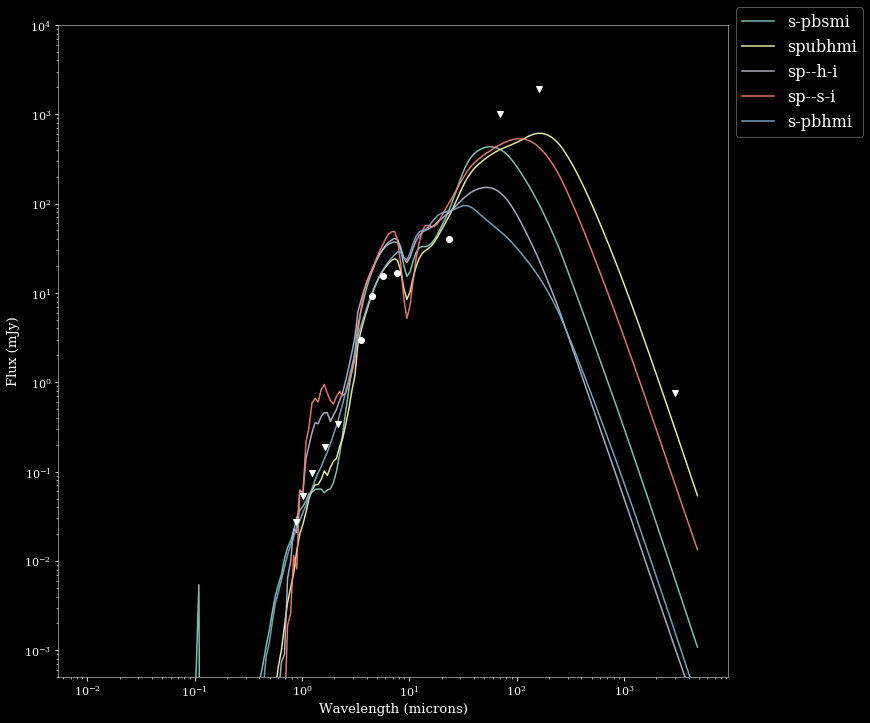

In [41]:
pl.figure(figsize=(12,12))

for geom in geometries:
    fitinfo=bestfits[geom]
    
    model_dir = f'{robitaille_modeldir}/{geom}'
    sedcube = sedcube.read(f"{model_dir}/flux.fits",)
    
    index = np.nanargmin(fitinfo.chi2)
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    _=pl.plot(sedcube.wav, sed.flux[apnum] * fitinfo.sc[index] * 10 ** (fitinfo.av[index] * extinction.get_av(sed.wav)),label=geom, alpha=0.9)
   # _=pl.plot(wavelengths.value,



wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')



apnum = np.argmin(np.abs((0.9*u.arcsec * 2.2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2.2*u.kpc

#_=pl.plot(sedcube.wav,
#          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
#          alpha=0.1, color='g')



         # (10**fitinfo.model_fluxes[np.nanargmin(fitinfo.chi2), :].T),
          #alpha=0.9,label=geom)

_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,1e4)
_=pl.legend(bbox_to_anchor=(1.0,1.04))

## Multi-Figure Plot

In [42]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

In [74]:
def datafunction(geom, chi2lim, bestfits):
    pars = Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
    fitinfo = bestfits[geom]
    selection = fitinfo.chi2 < np.nanmin(fitinfo.chi2) + chi2lim
    data = pars[fitinfo.model_id[selection]]
    return pars, data, selection

In [44]:
# how strong should our filter be? (bigger number = more generous filter)
chi2lim = 16.45026315*3

In [45]:
selection = fitinfo.chi2 < np.nanmin(fitinfo.chi2) + chi2lim

def make_extinction():
    # make an extinction law
    ext = F19(3.1)

    # https://arxiv.org/abs/0903.2057
    # 1.34 is from memory
    guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
    ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
    ext_vals = ext.evaluate(ext_wav, Rv=3.1)
    extinction = Extinction()
    extinction.wav = ext_wav
    extinction.chi = ext_vals / guyver2009_avtocol

    return extinction

In [46]:
def plot_fit(bestfits, geometries,
        chi2lim,
        extinction=make_extinction(),
        show_per_aperture=True,
        default_aperture=0.9*u.arcsec,
        robitaille_modeldir='/blue/adamginsburg/richardson.t/research/flux/robitaille_models/',
        show_all_models=False,
             alpha_allmodels=0.1,
            ):
    pass

In [47]:
def binsfunction(param, kind, binsnum, chi2lim, geometries, bestfits, massnum=9):
    datamin = []
    datamax = []
    for geom in geometries:
        pars, data, selection = datafunction(geom, chi2lim, bestfits)
        if param in pars.keys():
            if param == "Line-of-Sight Masses":
                dataparam = data[param]
                datamin.append(dataparam[massnum].min())
                datamax.append(dataparam[massnum].max())
            if param == "Sphere Masses":
                dataparam = data[param]
                datamin.append(dataparam[massnum].min())
                datamax.append(dataparam[massnum].max())
            else:
                datamin.append(data[param].min())
                datamax.append(data[param].max())

    for x in datamin:
        if x == 0:
            datamin.remove(x)
            
    for x in datamax:
        if x == 0:
            datamax.remove(x)
    
    if kind is 'log':
        binsmin = np.log10(min(datamin))
        binsmax = np.log10(max(datamax))
        bins = np.logspace(binsmin, binsmax, binsnum)
    
    if kind is 'lin':
        binsmin = min(datamin)
        binsmax = max(datamax)
        bins = np.linspace(binsmin, binsmax, binsnum)

    if kind is 'geom':
        binsmin = min(datamin)
        binsmax = max(datamax)
        bins = np.geomspace(binsmin, binsmax, binsnum)
        
    if kind is 'dist':
        binsmin = min(fitinfo.sc[selection])
        binsmax = max(fitinfo.sc[selection])
        bins = np.geomspace(binsmin, binsmax, binsnum)
        
    if kind is 'ext':
        binsmin = min(fitinfo.av[selection])
        binsmax = max(fitinfo.av[selection])
        bins = np.geomspace(binsmin, binsmax, binsnum)

    return bins

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


(450.0, 2400.0, 450.0, 2400.0)

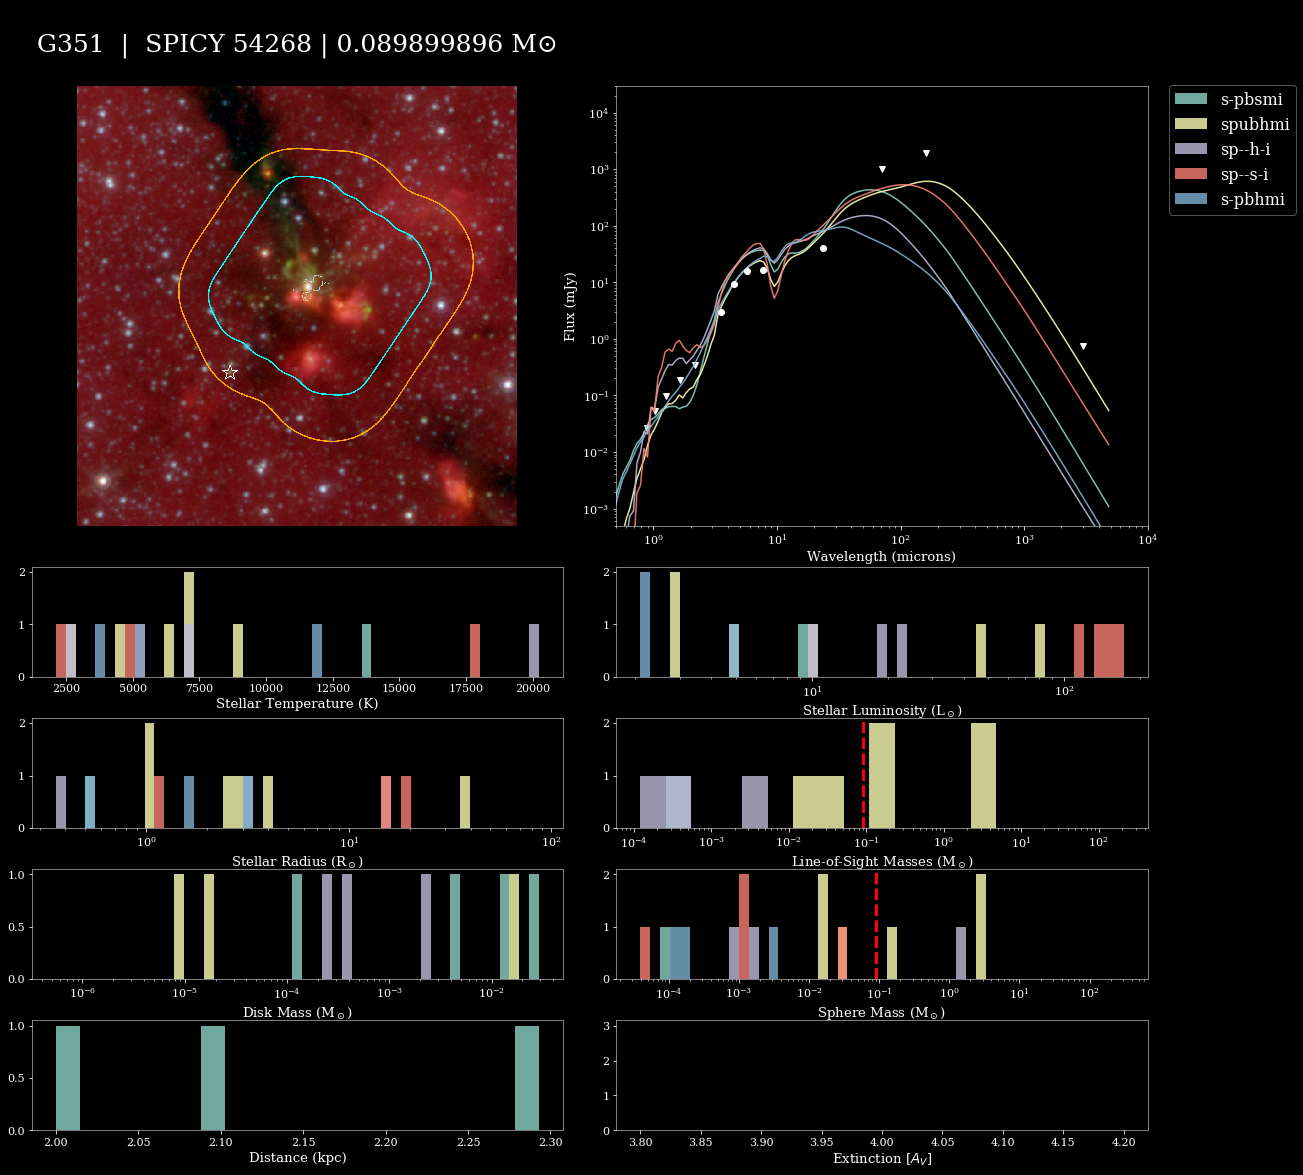

In [48]:
basefig = pl.figure(figsize=(20, 22))
gs = GridSpec(nrows=6, ncols=2, height_ratios=[4,1,1,1,1,1], hspace=0.25, wspace=0.1)

# --------------------------------

# Best fits plot
ax0 = basefig.add_subplot(gs[0, 1])
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

distance = 2.2*u.kpc

for geom in geometries:
    global sedcube
    
    apnum = np.argmin(np.abs((0.9*u.arcsec * 2.2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
    fitinfo = bestfits[geom]
    
    model_dir = f'{robitaille_modeldir}/{geom}'
    sedcube = SEDCube.read(f"{model_dir}/flux.fits",)
    
    index = np.nanargmin(fitinfo.chi2)
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    _=ax0.plot(sedcube.wav,
             sed.flux[apnum] * fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)),
             label=geom, alpha=0.9)
    
ax0.loglog()
ax0.set_xlabel('Wavelength (microns)')
ax0.set_ylabel("Flux (mJy)")
ax0.set_xlim(0.5,1e4)
ax0.set_ylim(5e-4,3e4)

# --------------------------------

# ax1 = stellar temperature
# ax2 = model luminosity

# ax3 = stellar radius
# ax4 = line-of-sight mass

# ax5 = disk mass
# ax6 = sphere mass

ax1 = basefig.add_subplot(gs[1, 0])
ax2 = basefig.add_subplot(gs[1, 1])
ax3 = basefig.add_subplot(gs[2, 0])
ax4 = basefig.add_subplot(gs[2, 1])
ax5 = basefig.add_subplot(gs[3, 0])
ax6 = basefig.add_subplot(gs[3, 1])
ax7 = basefig.add_subplot(gs[4, 0])
ax8 = basefig.add_subplot(gs[4, 1])


histalpha = 0.8
lognum = 50
linnum = 50

tempbins = binsfunction('star.temperature', 'lin', linnum, chi2lim, geometries, bestfits)
lumbins = binsfunction('Model Luminosity', 'log', lognum, chi2lim, geometries, bestfits)
radbins = binsfunction('star.radius', 'log', lognum, chi2lim, geometries, bestfits)
losbins = binsfunction('Line-of-Sight Masses', 'log', 20, chi2lim, geometries, bestfits, 0)
dscbins = binsfunction('disk.mass', 'log', lognum, chi2lim, geometries, bestfits)
sphbins = binsfunction('Sphere Masses', 'log', 50, chi2lim, geometries, bestfits, 0)
distbins = binsfunction(10**(fitinfo.sc[selection]), 'dist', linnum, chi2lim, geometries, bestfits)
extbins = binsfunction(fitinfo.av[selection], 'ext', linnum, chi2lim, geometries, bestfits)

for geom in geometries:
    pars, data, selection = datafunction(geom, chi2lim, bestfits)

    if 'star.temperature' in pars.keys():
        ax1.hist(data['star.temperature'], bins=tempbins, alpha=histalpha, label=geom)

    if 'Model Luminosity' in pars.keys():
        ax2.hist(data['Model Luminosity'], bins=lumbins, alpha=histalpha, label=geom)

    if 'star.radius' in pars.keys():
        ax3.hist(data['star.radius'], bins=radbins, alpha=histalpha, label=geom)

    if 'Line-of-Sight Masses' in pars.keys():
        ax4.hist(data['Line-of-Sight Masses'][:,1], bins=losbins, alpha=histalpha, label=geom)
        ax4.axvline(0.089899896, color='r', linestyle='dashed', linewidth=3)
        
    if 'disk.mass' in pars.keys():
        ax5.hist(data['disk.mass'], bins=dscbins, alpha=histalpha, label=geom)
        
    if 'Sphere Masses' in pars.keys():
        ax6.hist(data['Sphere Masses'][:,1], bins=sphbins, alpha=histalpha, label=geom)
        ax6.axvline(0.089899896, color='r', linestyle='dashed', linewidth=3)
        
ax7.hist(10**fitinfo.sc[selection], bins=20, alpha=histalpha, label=geom)
ax8.hist(fitinfo.av[selection], bins=extbins, alpha=histalpha, label=geom)

handles, labels = ax1.get_legend_handles_labels()
ax0.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.16,1.02))
ax1.set_xlabel("Stellar Temperature (K)")
ax2.set_xlabel("Stellar Luminosity (L$_\odot$)")
ax3.set_xlabel("Stellar Radius (R$_\odot$)")
ax4.set_xlabel("Line-of-Sight Masses (M$_\odot$)")
ax5.set_xlabel("Disk Mass (M$_\odot$)")
ax6.set_xlabel("Sphere Mass (M$_\odot$)")
ax7.set_xlabel("Distance (kpc)")
ax8.set_xlabel("Extinction [$A_V$]")

_=ax2.semilogx()
_=ax3.semilogx()
_=ax4.semilogx()
_=ax5.semilogx()
_=ax6.semilogx()

# --------------------------------

# reading the saved image of the region with source location marked
locfig = mpimg.imread(f'/home/spetz/figures/source2.png')

# my image needs to be flipped
locfig = np.flipud(locfig)

ax9 = basefig.add_subplot(gs[0, 0])
ax9.imshow(locfig)
ttl = ax9.set_title(f'\n{fieldid}  |  SPICY {54268} | 0.089899896 M⊙\n' , fontsize=25) 
ttl.set_position([.5, 1])
#ax9.axis([90,630,90,630])
ax9.axis([450,2400,450,2400])
ax9.axis('off')

(450.0, 2400.0, 450.0, 2400.0)

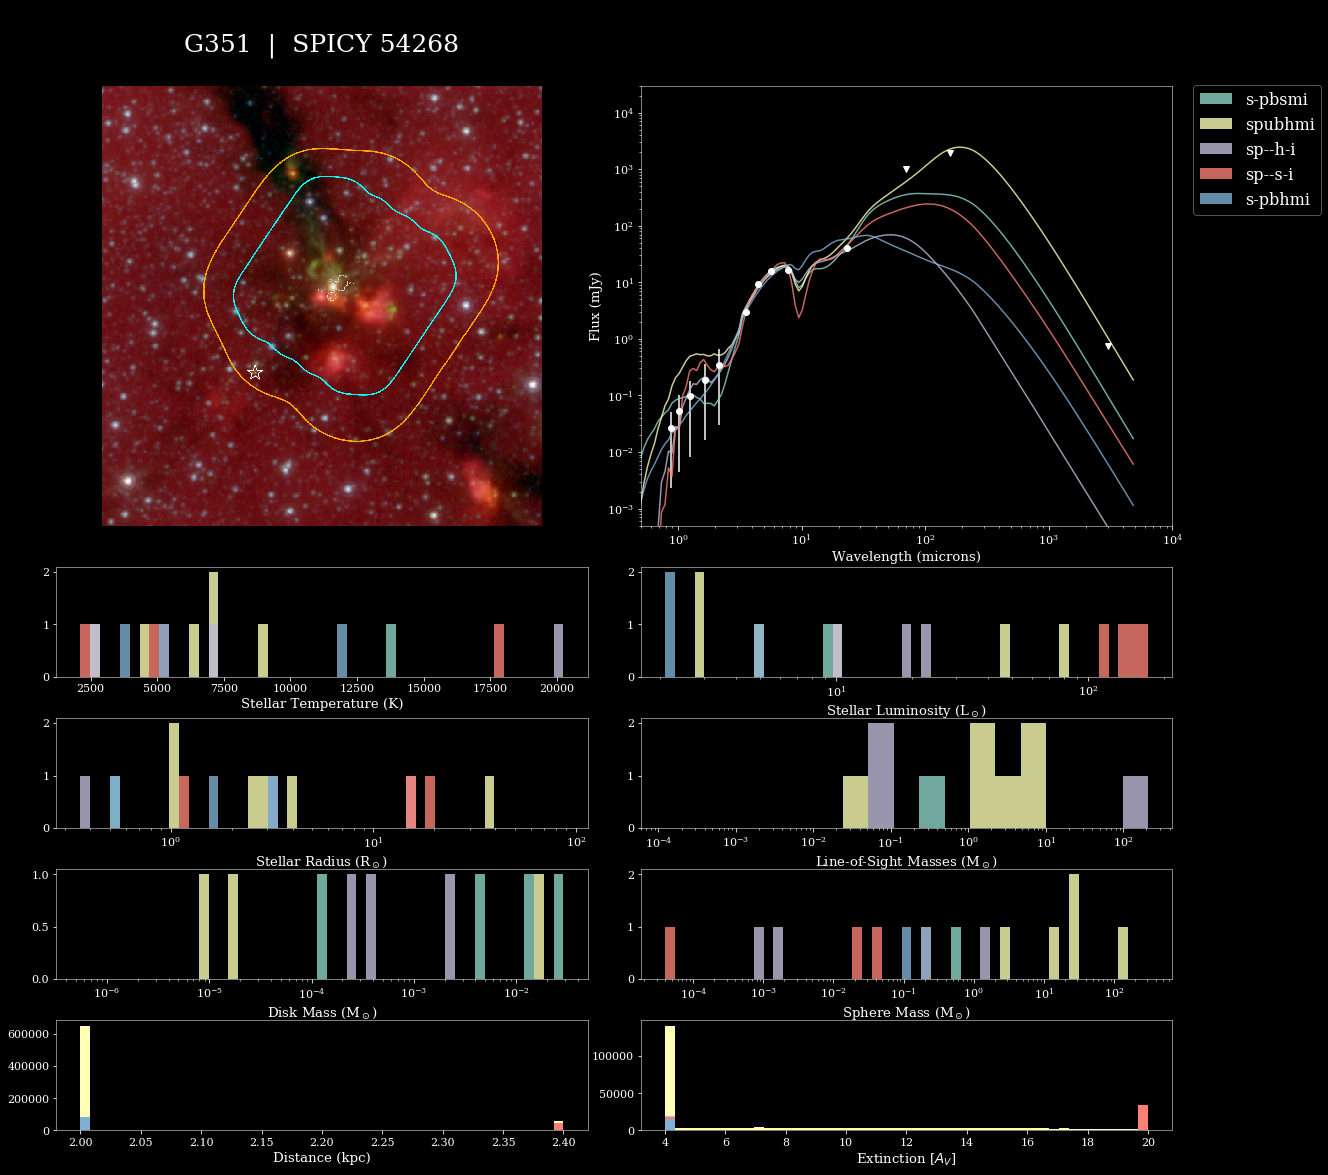

In [49]:
# Setting up the plot surface
basefig = pl.figure(figsize=(20, 22))
gs = GridSpec(nrows=6, ncols=2, height_ratios=[4,1,1,1,1,1], hspace=0.25, wspace=0.1)

valid[0]=3
valid[1]=3
valid[2]=3
valid[3]=3
valid[4]=3

 # --------------------------------
# Best fits plot
ax0 = basefig.add_subplot(gs[0, 1])
#wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
fitinfo = bestfits[geometries[0]]
source = fitinfo.source
valid = source.valid
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid==1], source.flux[valid==1], yerr=source.error[valid==1], linestyle='none', color='w', marker='o')
pl.plot(wavelengths.value[valid==3], source.flux[valid==3], linestyle='none', color='w', marker='v')

distance = (10**fitinfo.sc * u.kpc).mean()
    
for geom in geometries:

    fitinfo = bestfits[geom]

    model_dir = f'{robitaille_modeldir}/{geom}'
    sedcube = SEDCube.read(f"{model_dir}/flux.fits",)

           
        
    index = np.nanargmin(fitinfo.chi2)
        
    distance = (10**fitinfo.sc[index] * u.kpc)

    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)

    apnum = np.argmin(np.abs((0.9 * distance).to(u.au, u.dimensionless_angles()) - sedcube.apertures))

        # https://github.com/astrofrog/sedfitter/blob/41dee15bdd069132b7c2fc0f71c4e2741194c83e/sedfitter/sed/sed.py#L64
    distance_scale = (1*u.kpc/distance)**2
        
        # https://github.com/astrofrog/sedfitter/blob/41dee15bdd069132b7c2fc0f71c4e2741194c83e/sedfitter/sed/sed.py#L84
    av_scale = 10**((fitinfo.av[index] * extinction.get_av(sed.wav)))
        
    line, = ax0.plot(sedcube.wav,
            sed.flux[apnum] * distance_scale * av_scale,
            label=geom, alpha=histalpha)

        
    indices = fitinfo.chi2 < chi2lim


# for geom in geometries:
#     fitinfo=bestfits[geom]
    
#     model_dir = f'{robitaille_modeldir}/{geom}'
#     sedcube = sedcube.read(f"{model_dir}/flux.fits",)
    
#     index = np.nanargmin(fitinfo.chi2)
#     modelname = fitinfo.model_name[index]
#     sed = sedcube.get_sed(modelname)
#     _=pl.plot(sedcube.wav, sed.flux[apnum] * fitinfo.sc[index] * 10 ** (fitinfo.av[index] * extinction.get_av(sed.wav)),label=geom, alpha=0.9)

    
ax0.loglog()
ax0.set_xlabel('Wavelength (microns)')
ax0.set_ylabel("Flux (mJy)")
ax0.set_xlim(0.5,1e4)
ax0.set_ylim(5e-4,3e4)

    # --------------------------------

    # ax1 = stellar temperature
    # ax2 = model luminosity

    # ax3 = stellar radius
    # ax4 = line-of-sight mass

    # ax5 = disk mass
    # ax6 = sphere mass

ax1 = basefig.add_subplot(gs[1, 0])
ax2 = basefig.add_subplot(gs[1, 1])
ax3 = basefig.add_subplot(gs[2, 0])
ax4 = basefig.add_subplot(gs[2, 1])
ax5 = basefig.add_subplot(gs[3, 0])
ax6 = basefig.add_subplot(gs[3, 1])
ax7 = basefig.add_subplot(gs[4, 0])
ax8 = basefig.add_subplot(gs[4, 1])

    
histalpha = 0.8
lognum = 50
linnum = 50

tempbins = binsfunction('star.temperature', 'lin', linnum, chi2lim, geometries, bestfits)
#tempbins = np.linspace(2000, 30000, 50)
lumbins = binsfunction('Model Luminosity', 'log', lognum, chi2lim, geometries, bestfits)
#lumbins = np.logspace(-4,7,100)
radbins = binsfunction('star.radius', 'log', lognum, chi2lim, geometries, bestfits)
#radbins = np.geomspace(0.1, 100, 50)
try:
    losbins = binsfunction('Line-of-Sight Masses', 'log', 20, chi2lim, geometries, bestfits, 0)
except ValueError:
    losbins = np.geomspace(1e-4,10)
try:
    dscbins = binsfunction('disk.mass', 'log', lognum, chi2lim, geometries, bestfits)
except ValueError:
        # this is OK; some models don't have disks
    pass
sphbins = binsfunction('Sphere Masses', 'log', 50, chi2lim, geometries, bestfits, 0)

    # index values used above and below for mass-related parameters should, i think, be the same as your
    # massnum index, which again has to do with aperture sizes

for geom in geometries:
    pars, data, selection = datafunction(geom, chi2lim, bestfits)

    if 'star.temperature' in pars.keys():
        ax1.hist(data['star.temperature'], bins=tempbins, alpha=histalpha, label=geom)

    if 'Model Luminosity' in pars.keys():
        ax2.hist(data['Model Luminosity'], bins=lumbins, alpha=histalpha, label=geom)

    if 'star.radius' in pars.keys():
        ax3.hist(data['star.radius'], bins=radbins, alpha=histalpha, label=geom)

    if 'Line-of-Sight Masses' in pars.keys():
        ax4.hist(data['Line-of-Sight Masses'][:,apnum], bins=losbins, alpha=histalpha, label=geom)

    if 'disk.mass' in pars.keys():
        ax5.hist(data['disk.mass'], bins=dscbins, alpha=histalpha, label=geom)

    if 'Sphere Masses' in pars.keys():
        ax6.hist(data['Sphere Masses'][:,apnum], bins=sphbins, alpha=histalpha, label=geom)
 

for geom in geometries:
        fitinfo = bestfits[geom]

        distances = 10**fitinfo.sc
        ax7.hist(distances, bins=np.linspace(distances.min(), distances.max()))

        ax8.hist(fitinfo.av, bins=np.linspace(np.nanmin(fitinfo.av), np.nanmax(fitinfo.av)))
    
            
handles, labels = ax1.get_legend_handles_labels()
ax0.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.16,1.02))
ax1.set_xlabel("Stellar Temperature (K)")
ax2.set_xlabel("Stellar Luminosity (L$_\odot$)")
ax3.set_xlabel("Stellar Radius (R$_\odot$)")
ax4.set_xlabel("Line-of-Sight Masses (M$_\odot$)")
ax5.set_xlabel("Disk Mass (M$_\odot$)")
ax6.set_xlabel("Sphere Mass (M$_\odot$)")
ax7.set_xlabel("Distance (kpc)")
ax8.set_xlabel("Extinction [$A_V$]")

_=ax2.semilogx()
_=ax3.semilogx()
_=ax4.semilogx()
_=ax5.semilogx()
_=ax6.semilogx()
    
locfig = mpimg.imread(f'/home/spetz/figures/source2.png')

# my image needs to be flipped
locfig = np.flipud(locfig)

ax9 = basefig.add_subplot(gs[0, 0])
ax9.imshow(locfig)
ttl = ax9.set_title(f'\n{fieldid}  |  SPICY {54268}\n', fontsize=25)
ttl.set_position([.5, 1])
#ax9.axis([90,630,90,630])
ax9.axis([450,2400,450,2400])
ax9.axis('off')

In [78]:
all_data = []
extinction_data, distance_data = [], []
for geom in geometries:
    pars, data, selection = datafunction(geom, chi2lim, bestfits)
    all_data.append(data)
    distance_data.append(10**bestfits[geom].sc[selection])
    extinction_data.append(bestfits[geom].av[selection])
data = table.vstack(all_data)
extinction_data

[<Quantity [5.01959485]>,
 <Quantity [ 9.44000942, 10.79781707,  8.90709527, 10.71450544,  4.        ,
             4.        ]>,
 <Quantity [6.04170771, 4.        , 4.20418896]>,
 <Quantity [9.67269465, 8.78004062, 6.97503291, 4.        ]>,
 <Quantity [4., 4., 4.]>]

In [79]:
(extinction_data)

TypeError: The value must be a valid Python or Numpy numeric type.

In [75]:
from astropy.stats import mad_std

all_data = []
extinction_data, distance_data = [], []
for geom in geometries:
    pars, data, selection = datafunction(geom, chi2lim, bestfits)
    all_data.append(data)
    distance_data.append(10**bestfits[geom].sc[selection])
    extinction_data.append(bestfits[geom].av[selection])
data = table.vstack(all_data)

star_temp_mean = np.nanmean(np.log10(data['star.temperature']))
model_lum_mean = np.nanmean(np.log10(data['Model Luminosity']))
star_rad_mean = np.nanmean(np.log10(data['star.radius']))
los_mass_mean = np.nanmean(np.log10(data['Line-of-Sight Masses'][:,1]))
#disk_mass_mean = np.nanmean(np.log10(data['disk.mass']))
sphere_mass_mean = np.nanmean(np.log10(data['Sphere Masses'][:,1]))
distance_mean = np.nanmean(np.log10(10**fitinfo.sc[selection]))
ext_mean = np.nanmean(np.log10(fitinfo.av[selection]))

star_temp_std = np.nanstd(np.log10(data['star.temperature']))
model_lum_std = np.nanstd(np.log10(data['Model Luminosity']))
star_rad_std = np.nanstd(np.log10(data['star.radius']))
los_mass_std = np.nanstd(np.log10(data['Line-of-Sight Masses'][:,1]))
#disk_mass_std = np.nanstd(np.log10(data['disk.mass']))
sphere_mass_std = np.nanstd(np.log10(data['Sphere Masses'][:,1]))
distance_std = np.nanstd(np.log10(10**fitinfo.sc[selection]))
ext_std = np.nanstd(np.log10(fitinfo.av[selection]))

star_temp_med = np.nanmedian(np.log10(data['star.temperature']))
model_lum_med = np.nanmedian(np.log10(data['Model Luminosity']))
star_rad_med = np.nanmedian(np.log10(data['star.radius']))
los_mass_med = np.nanmedian(np.log10(data['Line-of-Sight Masses'][:,1]))
#disk_mass_med = np.nanmedian(np.log10(data['disk.mass']))
sphere_mass_med = np.nanmedian(np.log10(data['Sphere Masses'][:,1]))
distance_med = np.nanmedian(np.log10(10**fitinfo.sc[selection]))
ext_med = np.nanmedian(np.log10(fitinfo.av[selection]))

star_temp_mad = mad_std(np.log10(data['star.temperature']))
model_lum_mad = mad_std(np.log10(data['Model Luminosity']))
star_rad_mad = mad_std(np.log10(data['star.radius']))
los_mass_mad = mad_std(np.log10(data['Line-of-Sight Masses'][:,1]))
#disk_mass_mad = mad_std(np.log10(data['disk.mass']))
sphere_mass_mad = mad_std(np.log10(data['Sphere Masses'][:,1]))
distance_mad = mad_std(np.log10(10**fitinfo.sc[selection]))
ext_mad = mad_std(np.log10(fitinfo.av[selection]))

PARAMETERS = ['star.temperature', 'Model Luminosity', 'star.radius', 'Line-of-Sight Masses', 'Sphere Masses',
             'distance', 'extinction']
STD = [star_temp_std, model_lum_std, star_rad_std, los_mass_std, sphere_mass_std, distance_std, ext_std]
MEAN = [star_temp_mean, model_lum_mean, star_rad_mean, los_mass_mean, sphere_mass_mean, distance_mean,
       ext_mean]
Median = [star_temp_med, model_lum_med, star_rad_med, los_mass_med, sphere_mass_med, distance_med,
       ext_med]
MAD = [star_temp_mad, model_lum_mad, star_rad_mad, los_mass_mad, sphere_mass_mad, distance_mad,
       ext_mad]

parameter_table = Table([PARAMETERS, MEAN, STD, Median, MAD],
             names=('Parameters', 'Mean', 'Standard Deviation','Median','Median Absolute Deviation'),
             meta={'name': 'SPICY 54268'})

parameter_table

Parameters,Mean,Standard Deviation,Median,Median Absolute Deviation
str20,float64,float64,float64,float64
star.temperature,3.802918092474555,0.27280723835823173,3.806586934327803,0.24420888353545045
Model Luminosity,1.2213334689335842,0.6700072750436082,1.0190224985331529,0.8443302678203141
star.radius,0.5274837103821793,0.6670115307524267,0.4695274791870139,0.6586039503092574
Line-of-Sight Masses,-1.6470867074714335,1.4341759682824675,--,1.895443304628422
Sphere Masses,-2.1668690334628287,1.5030707132470116,-2.5531258027496344,1.5371570229366747
distance,0.3274237443465228,0.024689091180671693,0.3208253071758874,0.029348572763561648
extinction,0.6020599913279624,0.0,0.6020599913279624,0.0


### Mass Estimates

In [51]:
from astropy.modeling.models import BlackBody
sed_tbl[5]

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54268,261.707452,-36.150529,351.791801,-0.5542,0.93,--,--,FS,False,False,-0.12810806350148,0.136925212094788,-0.12810806350148,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7918-00.5542,12.436,0.042,10.721,0.043,9.662,0.043,8.923,0.035,0,3,3,3,3,,,-2147483648,--,MG351.7917-00.5541,,--,True,G351,0.23177144427737117,0.6386497031582098,2481.9865696264214,1206.6117835816922,481.72225204186265,40.086,3.755,--,--,--,15.720,1.0,--,--,--,--,--,--,--,--,19.810,0.9970,18.988,0.9970,18.023,0.9970,16.844,0.9970,--,--,--,--,nan,0.25194190278621414,nan,nan,0.052943212767020784,0.0484,0.026974663181402018,0.0247,0.09579069,0.0876,0.1879800488357045,0.1719,0.34497768,0.3,2.9405465,0.11330546,9.215995,0.3635668,15.542704,0.61315256,16.717573,0.5368028,335.0,638.6497031582098,18010.108674396262,14735.459341648582,11547.734724845142,nan,--,--,--,--


In [67]:
index = np.where(tbl['SPICY'] == sed_tbl[5]['SPICY'])[0][0]

51

In [52]:
(((0.25194190278621414*3)*u.mJy * (2.2*u.kpc)**2) / (0.008*u.cm**2/u.g * BlackBody(20*u.K)(230*u.GHz) * u.sr)).to(u.M_sun)

<Quantity 0.0898999 solMass>

In [68]:
for new_column_name in (
'Temperature mean',
'Temperature standard deviation',
'Temperature Median',
'Temperature MAD',):
    if new_column_name not in tbl.colnames:
        tbl[new_column_name] = np.nan

In [69]:
tbl['Temperature mean'] = np.nan
tbl['Temperature standard deviation'] = np.nan
tbl['Temperature Median'] = np.nan
tbl['Temperature MAD'] = np.nan

tbl['Temperature mean'][index] = star_temp_mean
tbl['Temperature standard deviation'][51] = star_temp_std
tbl['Temperature Median'][51] = star_temp_med
tbl['Temperature MAD'][51] = star_temp_mad

tbl['Luminosity mean'] = np.nan
tbl['Luminosity standard deviation'] = np.nan
tbl['Luminosity Median'] = np.nan
tbl['Luminosity MAD'] = np.nan

tbl['Luminosity mean'][51] = model_lum_mean
tbl['Luminosity standard deviation'][51] = model_lum_std
tbl['Luminosity Median'][51] = model_lum_med
tbl['Luminosity MAD'][51] = model_lum_mad

tbl['Radius mean'] = np.nan
tbl['Radius standard deviation'] = np.nan
tbl['Radius Median'] = np.nan
tbl['Radius MAD'] = np.nan

tbl['Radius mean'][51] = star_rad_mean
tbl['Radius standard deviation'][51] = star_rad_std
tbl['Radius Median'][51] = star_rad_med
tbl['Radius MAD'][51] = star_rad_mad

tbl['LOS mass mean'] = np.nan
tbl['LOS mass standard deviation'] = np.nan
tbl['LOS mass Median'] = np.nan
tbl['LOS mass MAD'] = np.nan

tbl['LOS mass mean'][51] = los_mass_mean
tbl['LOS mass standard deviation'][51] = los_mass_std
tbl['LOS mass Median'][51] = los_mass_med
tbl['LOS mass MAD'][51] = los_mass_mad

tbl['Sphere mass mean'] = np.nan
tbl['Sphere mass standard deviation'] = np.nan
tbl['Sphere mass Median'] = np.nan
tbl['Sphere mass MAD'] = np.nan

tbl['Sphere mass mean'][51] = sphere_mass_mean
tbl['Sphere mass standard deviation'][51] = sphere_mass_std
tbl['Sphere mass Median'][51] = sphere_mass_med
tbl['Sphere mass MAD'][51] = sphere_mass_mad

tbl['Distance mean'] = np.nan
tbl['Distance standard deviation'] = np.nan
tbl['Distance Median'] = np.nan
tbl['Distance MAD'] = np.nan

tbl['Distance mean'][51] = distance_mean
tbl['Distance standard deviation'][51] = distance_std
tbl['Distance Median'][51] = distance_med
tbl['Distance MAD'][51] = distance_mad

tbl['Extinction mean'] = np.nan
tbl['Extinction standard deviation'] = np.nan
tbl['Extinction Median'] = np.nan
tbl['Extinction MAD'] = np.nan

tbl['Extinction mean'][51] = ext_mean
tbl['Extinction standard deviation'][51] = ext_std
tbl['Extinction Median'][51] = ext_med
tbl['Extinction MAD'][51] = ext_mad

tbl['Included Geometries'] = ''
tbl['Included Geometries'][51] = ",".join(geometries)
tbl['Chi2 threshold'] = np.nan
tbl['Chi2 threshold'][51] = chi2lim

In [70]:
",".join(geometries)

's-pbsmi,spubhmi,sp--h-i,sp--s-i,s-pbhmi'

In [54]:
tbl[51]

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux,Temperature mean,Temperature standard deviation,Temperature Median,Temperature MAD,Luminosity mean,Luminosity standard deviation,Luminosity Median,Luminosity MAD,Radius mean,Radius standard deviation,Radius Median,Radius MAD,LOS mass mean,LOS mass standard deviation,LOS mass Median,LOS mass MAD,Sphere mass mean,Sphere mass standard deviation,Sphere mass Median,Sphere mass MAD,Distance mean,Distance standard deviation,Distance Median,Distance MAD,Extinction mean,Extinction standard deviation,Extinction Median,Extinction MAD
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
54268,261.707452,-36.150529,351.791801,-0.5542,0.93,--,--,FS,False,False,-0.12810806350148,0.136925212094788,-0.12810806350148,--,EnvIII,G351.7-0.5,--,--,--,--,--,SSTGLMC G351.7918-00.5542,12.436,0.042,10.721,0.043,9.662,0.043,8.923,0.035,0,3,3,3,3,,,-2147483648,--,MG351.7917-00.5541,,--,True,G351,0.23177144427737117,0.6386497031582098,2481.9865696264214,1206.6117835816922,481.72225204186265,40.086,3.755,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,nan,0.25194190278621414,nan,0.4857932886640101,--,--,--,--,--,--,--,--,--,--,2.9405465,0.11330546,9.215995,0.3635668,15.542704,0.61315256,16.717573,0.5368028,231.7714442773712,638.6497031582098,18010.108674396262,14735.459341648582,11547.734724845142,--,--,--,--,--,3.8015566132445717,0.20783936841026968,3.7349597612724454,0.21947709818361164,0.45

In [59]:
tbl[48:53]

SPICY,ra,dec,l,b,p1,p2,p3,class,silicate,pah,alpha,alpha_8,alpha_24,alpha_w4,env,group,var,nr,r,sigmar,skewnessr,Spitzer,mag3_6,e_mag3_6,mag4_5,e_mag4_5,mag5_8,e_mag5_8,mag8_0,e_mag8_0,csf,m3_6,m4_5,m5_8,m8_0,2MASS,UKIDSS,VIRAC,GaiaDR2,MIPS,AllWISE,ZTFDR3,in_ALMAIMF,ALMAIMF_FIELDID,70,160,250,350,500,Spitzer/MIPS.24mu_flux,Spitzer/MIPS.24mu_eflux,M24_flux_uplim,RA_ICRS,DE_ICRS,Ksmag,KsEll,pm,e_pm,pmRA,e_pmRA,pmDE,e_pmDE,Nep,flgrel,Zmag,Zell,Ymag,Yell,Jmag,Jell,Hmag,Hell,Zdetflg,Ydetflg,Jdetflg,Hdetflg,ALMA-IMF_3mm_flux,ALMA-IMF_3mm_eflux,ALMA-IMF_1mm_flux,ALMA-IMF_1mm_eflux,Paranal/VISTA.Y_flux,Paranal/VISTA.Y_eflux,Paranal/VISTA.Z_flux,Paranal/VISTA.Z_eflux,Paranal/VISTA.J_flux,Paranal/VISTA.J_eflux,Paranal/VISTA.H_flux,Paranal/VISTA.H_eflux,Paranal/VISTA.Ks_flux,Paranal/VISTA.Ks_eflux,Spitzer/IRAC.I1_flux,Spitzer/IRAC.I1_eflux,Spitzer/IRAC.I2_flux,Spitzer/IRAC.I2_eflux,Spitzer/IRAC.I3_flux,Spitzer/IRAC.I3_eflux,Spitzer/IRAC.I4_flux,Spitzer/IRAC.I4_eflux,Herschel/Pacs.blue_eflux,Herschel/Pacs.red_eflux,Herschel/SPIRE.PSW_eflux,Herschel/SPIRE.PMW_eflux,Herschel/SPIRE.PLW_eflux,Herschel/Pacs.blue_flux,Herschel/Pacs.red_flux,Herschel/SPIRE.PSW_flux,Herschel/SPIRE.PMW_flux,Herschel/SPIRE.PLW_flux,Temperature mean,Temperature standard deviation,Temperature Median,Temperature MAD,Luminosity mean,Luminosity standard deviation,Luminosity Median,Luminosity MAD,Radius mean,Radius standard deviation,Radius Median,Radius MAD,LOS mass mean,LOS mass standard deviation,LOS mass Median,LOS mass MAD,Sphere mass mean,Sphere mass standard deviation,Sphere mass Median,Sphere mass MAD,Distance mean,Distance standard deviation,Distance Median,Distance MAD,Extinction mean,Extinction standard deviation,Extinction Median,Extinction MAD
,deg,deg,deg,deg,,,,,,,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,,,Jy / pix,Jy / pix,MJy / sr,MJy / sr,MJy / sr,mJy,mJy,MJy / sr,deg,deg,mag,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,,mag,,mag,,mag,,,,,,mJy / beam,mJy / beam,mJy / beam,mJy / beam,,,,,,,,,,,mJy,mag mJy,mJy,mag mJy,,mag,,mag,mJy,mJy,mJy,mJy,mJy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,bytes9,bool,bool,float64,float64,float64,float64,bytes7,bytes10,int16,int16,float64,float64,float64,bytes26,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,bytes18,bytes19,int32,int64,bytes18,bytes20,int64,bool,bytes8,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int16,uint8,float64,float32,float64,float32,float32,float32,float64,float32,uint8,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
75752,272.62026,-19.930292,10.623936,-0.384253,0.59,--,--,ClassI,False,False,2.17676392879055,2.17676392879055,--,--,EnvIII,G10.6-0.2,--,--,--,--,--,SSTGLMC G010.6239-00.3842,11.401,0.105,9.319,0.237,7.779,0.123,6.279,0.122,1,2,1,2,2,18102886-1955505,,-2147483648,--,,,--,True,G10,197.5228638291646,108.03780026741853,--,--,--,--,265.463,276.87738,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,2164.253726758893,0.05330248523813081,2628.709020400214,0.11638487988885025,--,--,--,--,--,--,--,--,--,--,7.628306,0.73483676,33.522915,7.288927,88.049446,9.935855,190.88564,21.365181,197522.86382916462,108037.80026741853,--,--,--,--,--,--,--,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
55876,262.595587,-34.679681,353.41732,-0.341903,0.76,

In [60]:
tbl['blah'] = np.nan

In [55]:
tbl.write('SydneysUpdatedSPICYTable.fits')